# Corpus Studies: Assignment 3
## Annotators: Can Serge Mersin, Margot Bloemen

In [22]:
import os 
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import cohen_kappa_score
import itertools
import matplotlib.pyplot as plt
import random as random

In [23]:
df = pd.read_csv("content/sample_data/Cleft_data_for_annotation - Sheet1-2.csv")

In [24]:
df = df.iloc[0:32] #
print(df.head) 
rater1 = df['generalization_annotator1'].to_numpy() 
rater2 = df['generalization_annotator2'].to_numpy()

<bound method NDFrame.head of      nr                                     previous_turns speaker_id  \
0    30  > <tr> <td valign="top">Arthur (PS03S) </td> <...      PS03T   
1    45  > <td valign="top">Audrey (PS1A9) </td> <td> [...      PS1A9   
2    48  ?<br></td> </tr> <tr> <td valign="top">Terri (...      PS03X   
3    56  valign="top">Terri (PS03X) </td> <td> [2421] W...      PS03Y   
4    59  actually opened <br></td> </tr> <tr> <td valig...   KBDPSUNK   
5    76  > <tr> <td valign="top">Hugh (PS03Y) </td> <td...      PS03W   
6    78  > </tr> <tr> <td valign="top">Sally (PS04H) </...      PS04H   
7   104  ... on one of the panels!<br></td> </tr> <tr> ...      PS04Y   
8   114                                            #ERROR!      PS04Y   
9   127  being nice [...] <br></td> </tr> <tr> <td vali...      PS04Y   
10  134  > <tr> <td valign="top">Dave (PS04V) </td> <td...      PS04V   
11  136  [12371] Sara ?<br></td> </tr> <tr> <td valign=...      PS04U   
12  140  to you mate.

In [25]:
rater1 = [
    'specific', 'specific', 'specific', 'general', 'specific', 'specific',
    'specific', 'specific', 'general', 'specific', 'specific', 'specific',
    'specific', 'general', 'specific', 'specific', 'specific', 'general',
    'unclear', 'specific', 'general', 'specific', 'unclear', 'unclear',
    'specific', 'specific', 'general', 'specific', 'general', 'specific',
    'specific', 'specific'
]

rater2 = [
    'specific', 'specific', 'specific', 'specific', 'general', 'specific',
    'specific', 'specific', 'specific', 'general', 'specific', 'specific',
    'general', 'specific', 'specific', 'specific', 'specific', 'general',
    'specific', 'specific', 'specific', 'specific', 'specific', 'general',
    'specific', 'specific', 'specific', 'specific', 'general', 'specific',
    'specific', 'specific'
]

In [26]:
print("Cohen's kappa = " + str(cohen_kappa_score(rater1, rater2, labels=None, weights='quadratic', sample_weight=None)))


Cohen's kappa = 0.03448275862068961


Normalized confusion matrix


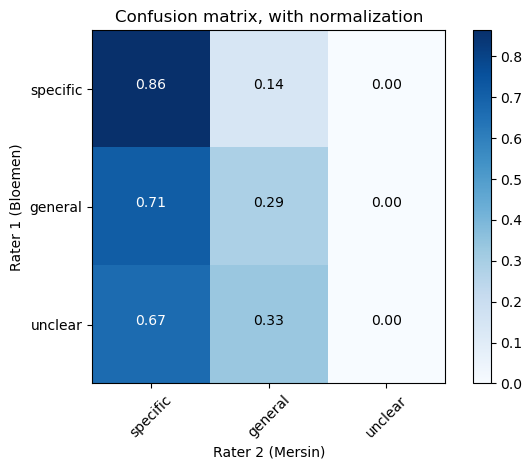

In [27]:
classes = ['specific','general','unclear'] 

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization') # change to 'without normalization' if you calculate the confusion matrix without
                                                        # normalization (i.e. just want to see the raw numbers)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Rater 1 (Bloemen)') # replace X & Y by your respective names
    plt.xlabel('Rater 2 (Mersin)')
    plt.tight_layout()

cnf_matrix = confusion_matrix(rater1, rater2,labels=['specific','general','unclear'],)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['specific','general','unclear'],
                      title='Confusion matrix, with normalization')